In [16]:
import numpy as np
import matplotlib.pyplot as plt

from Calibration import Calibration, Atmospheric_effects

import os
from astropy.io import fits

In [18]:
cold_hdu = fits.open("../spectra/Cold_1.fits")
cold = cold_hdu[0].data
cold_header = cold_hdu[0].header

hot_hdu = fits.open("../spectra/ground_hot_1.fits")
hot = hot_hdu[0].data

obj_hdu = fits.open("../spectra/Hot_3C48_1.fits")
obj = obj_hdu[0].data

plane_hdu = fits.open("../spectra/plane_1.fits")
plane = plane_hdu[0].data
plane_header = plane_hdu[0].header

In [19]:
f=cold
Vector_length = int(2**13)
print(np.shape(f)[0]/Vector_length)


central_freq = 1420.405751768e6
# central_freq = 1420e6
Bandwidth = 10e6
frequency_spacing=Bandwidth/Vector_length
freq = (np.linspace((central_freq-Bandwidth/2), central_freq + Bandwidth/2 , Vector_length)/1e6) - central_freq/1e6
f = f[0:Vector_length]

1.0


In [20]:
def plot(f):
    f = f[0:Vector_length]
    fig,ax=plt.subplots(figsize=(10,5))
    ax.axvline(x=0/1e6, color='r', linestyle='--', label='test HI 21cm line')
    ax.step(freq,10**f,where='mid',label='Frequency Spectrum')
    ax.set_xlabel(r"Frequency ($\Delta \nu$) [MHz]")
    ax.set_ylabel("Amplitude")
    ax.set_title("Frequency Spectrum")
    ax.grid()
    ax.legend()

/var/folders/74/__d4fvn923b5nsfrydw7vf4m0000gn/T/ipykernel_3241/3470679524.py:5: RuntimeWarning: overflow encountered in power
  ax.step(freq,10**f,where='mid',label='Frequency Spectrum')


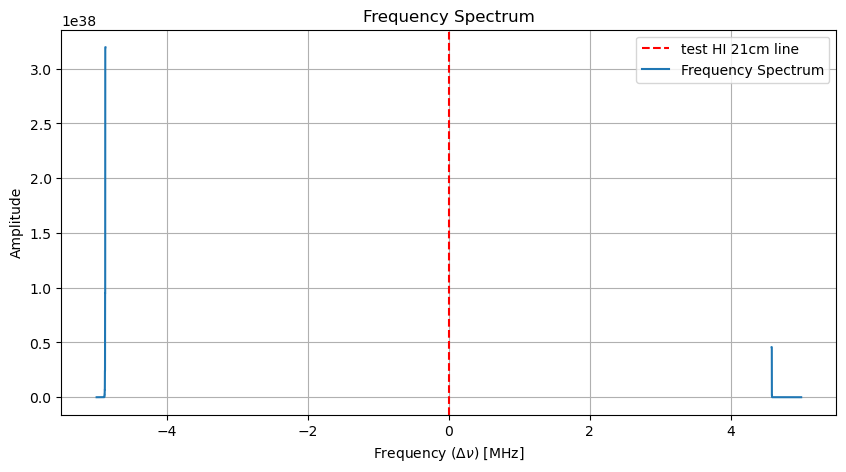

In [21]:
plot(plane)

/var/folders/74/__d4fvn923b5nsfrydw7vf4m0000gn/T/ipykernel_3241/3470679524.py:5: RuntimeWarning: overflow encountered in power
  ax.step(freq,10**f,where='mid',label='Frequency Spectrum')
/var/folders/74/__d4fvn923b5nsfrydw7vf4m0000gn/T/ipykernel_3241/3470679524.py:5: RuntimeWarning: invalid value encountered in power
  ax.step(freq,10**f,where='mid',label='Frequency Spectrum')


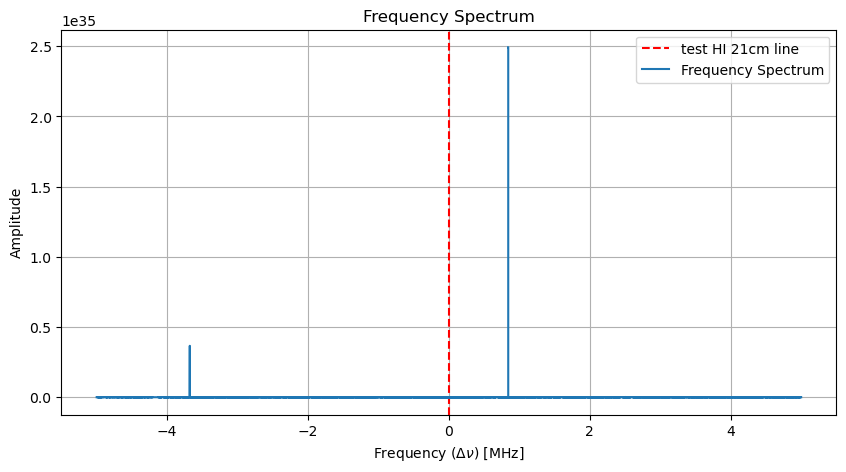

In [13]:
plot(hot)

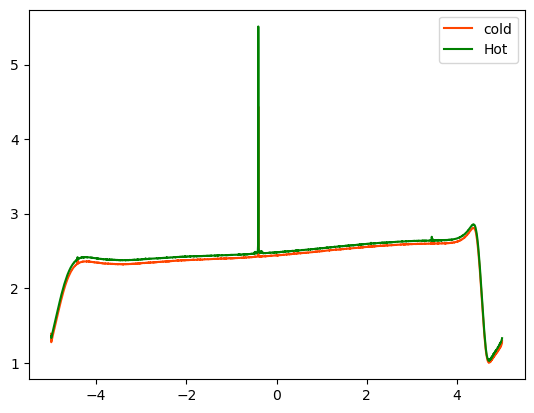

In [24]:
plt.plot(freq, np.log10(cold), color="orangered", linestyle="-", label="cold")
plt.plot(freq, np.log10(hot), "g-", label="Hot")
plt.legend()
plt.show()

In [ ]:
# Calibration
Th=273.15+16
Tc=7

def Tsys(Y):
    return (Th-Tc*Y)/(Y-1)
Tsys_nu= Tsys(10**hot/10**cold)

print(np.mean(Tsys_nu))
print(np.std(Tsys_nu))

124.98349
23.013235


NameError: name 'freq' is not defined

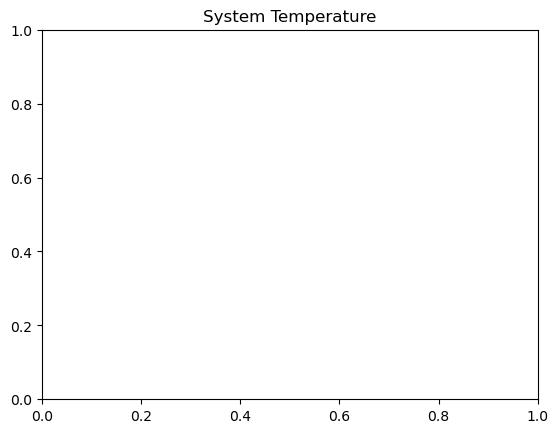

In [4]:
plt.title("System Temperature")

plt.plot(freq,Tsys_nu)
plt.show()

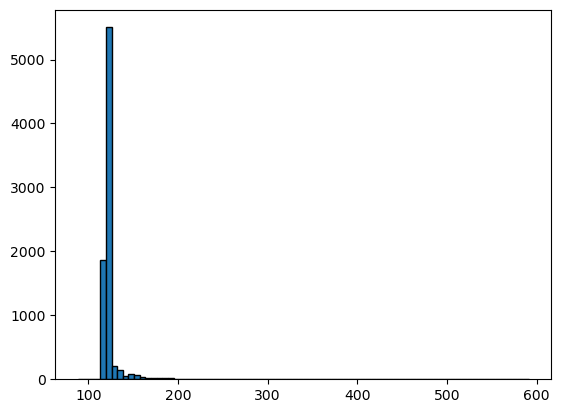

In [7]:
plt.hist(Tsys_nu, 80, ec="black")
#plt.xlim(50, 175)
#plt.yscale("log")
plt.show()

In [6]:
def flat_field(data, shape_norm):
    return 10**data / shape_norm

In [10]:
hot_sum_shape_norm = flat_field(hot, sum_shape_normalization)
cold_sum_shape_norm = flat_field(cold, sum_shape_normalization)
measure_sum_shape_norm = flat_field(measure, sum_shape_normalization)

NameError: name 'measure' is not defined

In [ ]:
print(f"normalized hot\nmax: {np.max(hot_sum_shape_norm)}\nmin: {np.min(hot_sum_shape_norm)}\nrange: {np.max(hot_sum_shape_norm) - np.min(hot_sum_shape_norm)}\nmean: {np.mean(hot_sum_shape_norm)}")
print(f"\nnormalized cold\nmax: {np.max(cold_sum_shape_norm)}\nmin: {np.min(cold_sum_shape_norm)}\nrange: {np.max(cold_sum_shape_norm) - np.min(cold_sum_shape_norm)}\nmean: {np.mean(cold_sum_shape_norm)}")

normalized hot
max: 27181498368.0
min: 27181494272.0
range: 4096.0
mean: 27181494272.0

normalized cold
max: 14479836160.0
min: 7509911040.0
range: 6969925120.0
mean: 7917050368.0


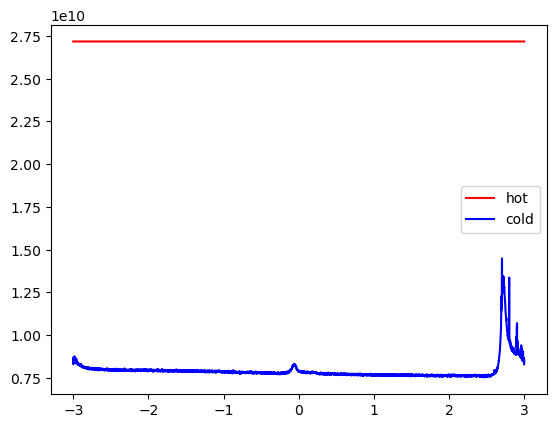

In [ ]:
plt.plot(freq, hot_sum_shape_norm, "r-", label="hot")
plt.plot(freq, cold_sum_shape_norm, "b-", label="cold")

plt.legend()

plt.show()

In [ ]:
hot_max_shape_norm = flat_field(hot, max_shape_normalization)
cold_max_shape_norm = flat_field(cold, max_shape_normalization)
measure_max_shape_norm = flat_field(measure, max_shape_normalization)

In [ ]:
print(f"normalized hot\nmax: {np.max(hot_max_shape_norm)}\nmin: {np.min(hot_max_shape_norm)}\nrange: {np.max(hot_max_shape_norm) - np.min(hot_max_shape_norm)}\nmean: {np.mean(hot_max_shape_norm)}")
print(f"\nnormalized cold\nmax: {np.max(cold_max_shape_norm)}\nmin: {np.min(cold_max_shape_norm)}\nrange: {np.max(cold_max_shape_norm) - np.min(cold_max_shape_norm)}\nmean: {np.mean(cold_max_shape_norm)}")

normalized hot
max: 7064928.5
min: 7064927.5
range: 1.0
mean: 7064928.0

normalized cold
max: 3763552.75
min: 1951952.125
range: 1811600.625
mean: 2057774.5


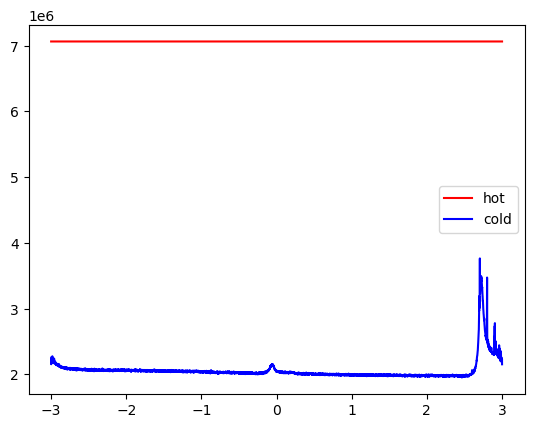

In [ ]:
plt.plot(freq, hot_max_shape_norm, "r-", label="hot")
plt.plot(freq, cold_max_shape_norm, "b-", label="cold")

plt.legend()

plt.show()

In [10]:
hot_mean_shape_norm = flat_field(hot, mean_shape_normalization)
cold_mean_shape_norm = flat_field(cold, mean_shape_normalization)
measure_mean_shape_norm = flat_field(plane, mean_shape_normalization)

print(f"normalized hot\nmax: {np.max(hot_mean_shape_norm)}\nmin: {np.min(hot_mean_shape_norm)}\nrange: {np.max(hot_mean_shape_norm) - np.min(hot_mean_shape_norm)}\nmean: {np.mean(hot_mean_shape_norm)}")
print(f"\nnormalized cold\nmax: {np.max(cold_mean_shape_norm)}\nmin: {np.min(cold_mean_shape_norm)}\nrange: {np.max(cold_mean_shape_norm) - np.min(cold_mean_shape_norm)}\nmean: {np.mean(cold_mean_shape_norm)}")

normalized hot
max: 2563873.75
min: 2563873.25
range: 0.5
mean: 2563873.5

normalized cold
max: 1750215.375
min: 654550.125
range: 1095665.25
mean: 821494.1875


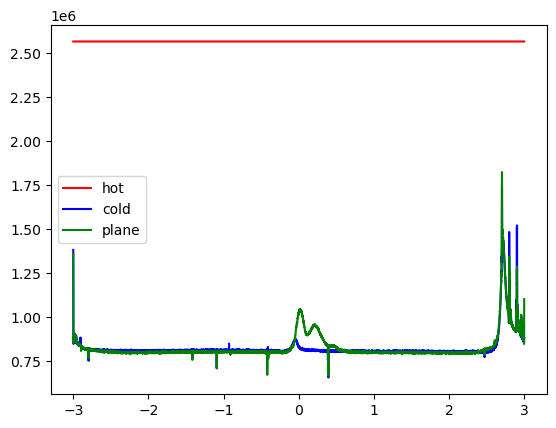

In [11]:
plt.plot(freq, hot_mean_shape_norm, "r-", label="hot")
plt.plot(freq, cold_mean_shape_norm, "b-", label="cold")
plt.plot(freq, measure_mean_shape_norm, "g-", label="plane")

plt.legend()

plt.show()

T_cold: 5.571247547737921 K K
T_hot: 288.0 K K


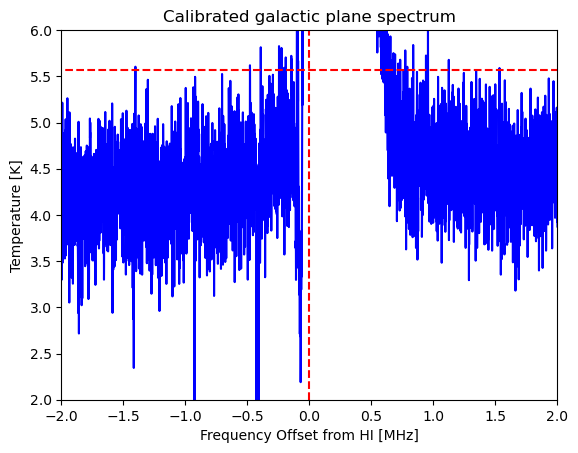

In [16]:
calibrate = Calibration(300, air_temperature=13+273)

cold_temp = calibrate.cold_temperature(30)
hot_temp = calibrate.hot_temperature(15+273)

print(f"T_cold: {cold_temp} K")
print(f"T_hot: {hot_temp} K")

y_factor = calibrate.Y_factor(10**hot, 10**cold)

tsys = calibrate.Tsys(10**hot, 10**cold)

tcal = calibrate.Tcal(10**plane, 10**hot, 10**cold)


plt.title("Calibrated galactic plane spectrum")

plt.plot(freq, tcal, "b-")
plt.axvline(0,  color="r", linestyle="--")
plt.axhline(cold_temp.value, -2, 2, color="r", linestyle="--")

plt.xlabel("Frequency Offset from HI [MHz]")
plt.ylabel("Temperature [K]")

plt.xlim(-2, 2)
plt.ylim(2, 6)

plt.show()

In [1]:
from astropy.io import fits

In [ ]:
hdu = fits.PrimaryHDU()

hdr = hdu.header

hdr["CRVAL1"] = (1420.405751768, "Central frequency")
hdr["CTYPE1"] = "MHz"
hdr["CRBIN1"] = (None, "Central frequency bin index")

hdr["ORIGIN"] = 'NBI '

hdr["TELESCOP"] = "NBI SRT Teaching Telescope"

hdr["EXPTIME"] = (None, "Integration time")

hdr["HIERARCH OBS START"] = (None, "Integration start time")

hdr["HIERARCH TEL GEOLAT"] = (55.701223, "Telescope geographic latitude")
hdr["HIERARCH TEL GEOLAT UNIT"] = "DEG"
hdr["HIERARCH TEL GEOLONG"] = (12.556672, "Telescope geographic longitude")
hdr["HIERARCH TEL GEOLONG UNIT"] = "DEG"

hdr["HIERARCH TEL GEOALT"] = (None, "Telescope geographic altitude")
hdr["HIERARCH TEL GEOALT UNIT"] = "METRES"

hdr["HIERARCH TEL MODE"] = ("SINGLE", "Single-dish or interferometry")

hdr["HIERARCH GAL LONG"] = (None, "Pointing galactic longitude l")
hdr["HIERARCH GAL LONG UNIT"] = "DEG"
hdr["HIERARCH GAL LAT"] = (None, "Pointing galactic latitude b")
hdr["HIERARCH GAL LAT UNIT"] = "DEG"


hdr["HIERARCH AZ START"] = (None, "Pointing azimuth at start")
hdr["HIERARCH AZ START UNIT"] = "DEG"
hdr["HIERARCH EL START"] = (None, "Pointing elevation at start")
hdr["HIERARCH EL START UNIT"] = "DEG"

hdr["HIERARCH AZ END"] = (None, "Pointing azimuth at end")
hdr["HIERARCH AZ END UNIT"] = "DEG"
hdr["HIERARCH EL END"] = (None, "Pointing elevation at end")
hdr["HIERARCH EL END UNIT"] = "DEG"


hdr["HIERARCH BANDWIDTH"] = (6, "Radiometer Bandwidth")
hdr["HIERARCH BANDWIDTH UNIT"] = "MHz"

In [9]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CRVAL1  =       1420.405751768 / Central frequency                              
CTYPE1  = 'MHz     '                                                            
CRBIN1  =  / Central frequency bin index                                        
ORIGIN  = 'NBI     '                                                            
TELESCOP= 'NBI SRT Teaching Telescope'                                          
EXPTIME =  / Integration time                                                   
HIERARCH OBS START =  / Integration start time                                  
HIERARCH TEL GEOLAT = 55.701223 / Telescope geographic latitude                 
HIERARCH TEL GEOLAT UNIT = '

In [6]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CRVAL1  =       1420.405751768 / Central frequency                              
CTYPE1  = 'MHz     '                                                            
CRBIN1  =  / Central frequency bin index                                        
ORIGIN  = 'NBI     '                                                            
TELESCOP= 'NBI SRT Teaching Telescope'                                          
EXPTIME =  / Integration time                                                   
HIERARCH OBS START =  / Integration start time                                  
HIERARCH TEL GEOLAT = 55.701223 / Telescope geographic latitude                 
HIERARCH TEL GEOLAT UNIT = '

In [12]:
hdu.writeto("../signal_processing/header_template.fits", overwrite=True)

In [13]:
hdu2 = fits.open("../signal_processing/header_template.fits")

In [ ]:
hdu2 = fits.open("../signal_processing/header_template.fits")
hdr2 = hdu2[0].header
hdu2.close()

In [5]:
hdu2[0].header["HIERARCH GAL LONG"] = 110

In [15]:
hdr2

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
CRVAL1  =       1420.405751768 / Central frequency                              
CTYPE1  = 'MHz     '                                                            
CRBIN1  =  / Central frequency bin index                                        
ORIGIN  = 'NBI     '                                                            
TELESCOP= 'NBI SRT Teaching Telescope'                                          
EXPTIME =  / Integration time                                                   
HIERARCH OBS START =  / Integration start time                                  
HIERARCH TEL GEOLAT = 55.701223 / Telescope geographic latitude                 
HIERARCH TEL GEOLAT UNIT = '

In [30]:
from astropy.io import fits
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
import astropy.units as u
import time
import os
import numpy as np

cache_fpath = os.getcwd()+"/radio_tests/06_03/"
spectra_fpath = os.getcwd()+"/radio_tests/spectra/"


def save_spectrum(fname, int_time, rotor_params):
    print("Detector: Saving spectrum to ", fname)

    hdu = fits.PrimaryHDU()

    binary_data = np.fromfile(open(cache_fpath + fname), dtype=np.float32)
    hdu.data = binary_data

    hdu.header = make_header(int_time, rotor_params)

    hdu.writeto(spectra_fpath + fname + ".fits")

    

def make_header(int_time, rotor_params):
    hdr = fits.open("../signal_processing/header_template.fits")[0].header

    hdr["EXPTIME"] = int_time

    hdr["HIERARCH OBS START"] = time.strftime("%d-%m-%YT%H:%M:%S", rotor_params[0])

    hdr["HIERARCH GAL LONG"] = rotor_params[1].l.deg
    hdr["HIERARCH GAL LAT"] = rotor_params[1].b.deg

    hdr["HIERARCH AZ START"] = rotor_params[2].az.deg
    hdr["HIERARCH EL START"] = rotor_params[2].alt.deg

    hdr["HIERARCH AZ END"] = rotor_params[3].az.deg
    hdr["HIERARCH EL END"] = rotor_params[3].alt.deg

    return hdr

In [31]:
int_time = 300

obs_loc = EarthLocation(
        lat=55.701223 * u.deg,
        lon=12.556672 * u.deg,
        height=100 * u.m
        )


int_start = time.gmtime()

gal_coords = SkyCoord(l=110, b=0, unit=(u.deg, u.deg), frame="galactic")

start_azel = AltAz(az = 90*u.deg, alt=45*u.deg)
end_azel = AltAz(az = 270*u.deg, alt=45*u.deg)


rotor_params = [int_start, gal_coords, start_azel, end_azel]


print(rotor_params)

save_spectrum("plane", int_time, rotor_params)


[time.struct_time(tm_year=2025, tm_mon=3, tm_mday=18, tm_hour=10, tm_min=38, tm_sec=6, tm_wday=1, tm_yday=77, tm_isdst=0), <SkyCoord (Galactic): (l, b) in deg
    (110., 0.)>, <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (90., 45.)>, <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (270., 45.)>]
Detector: Saving spectrum to  plane


In [34]:
plane

array([3.9658456, 3.7577925, 3.6067562, ..., 3.5696778, 3.5972881,
       3.7549746], dtype=float32)

In [13]:
from astropy.io import fits

import matplotlib.pyplot as plt
import numpy as np

hdu = fits.open("../spectra/galacticplane_L84b1.fits")
hdr = hdu[0].header
data = hdu[0].data
hdu.close()

In [14]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 8192                                                  
EXTEND  =                    T                                                  
CRVAL1  =       1420.405751768 / Central frequency                              
CTYPE1  = 'MHz     '                                                            
CRBIN1  =                 4096 / Central frequency bin index                    
ORIGIN  = 'NBI     '                                                            
TELESCOP= 'NBI SRT Teaching Telescope'                                          
EXPTIME =                  300 / Integration time                               
HIERARCH OBS START = '27-03-2025T14:23:55' / Integration start time             
HIERARCH TEL GEOLAT = 55.701

In [21]:
hdr["BANDWIDTH"] = (6, "SDR Bandwidth")
hdr["EXPTIME"] = (300, "Integration time")

In [22]:
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 8192                                                  
EXTEND  =                    T                                                  
CRVAL1  =       1420.405751768 / Central frequency                              
CTYPE1  = 'MHz     '                                                            
CRBIN1  =                 4096 / Central frequency bin index                    
ORIGIN  = 'NBI     '                                                            
TELESCOP= 'NBI SRT Teaching Telescope'                                          
EXPTIME =                  300 / Integration time                               
HIERARCH OBS START = '27-03-2025T14:23:55' / Integration start time             
HIERARCH TEL GEOLAT = 55.701

In [25]:
hdu2 = fits.PrimaryHDU()

hdu2.header = hdr
hdu2.data = data

hdu2.writeto("../spectra/galacticplane_fixedheader.fits", overwrite=True)

In [23]:
hdr["BANDWIDTH"]

6

In [9]:
bin_size = hdr["BANDWIDTH"] / hdr["NAXIS1"]

freq = np.arange(0,hdr["NAXIS1"]) * bin_size - hdr["BANDWIDTH"]/2 + hdr["CRVAL1"]

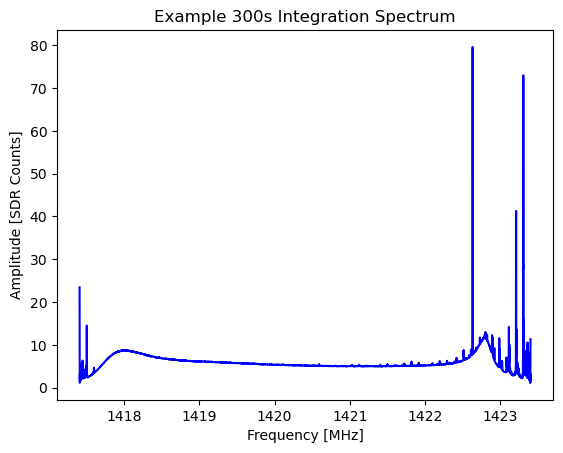

In [11]:
plt.title("Example 300s Integration Spectrum")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Amplitude [SDR Counts]")

plt.plot(freq, data, "b-")
plt.show()